In \[116\]:

    #The reviews of a restaurant play a very important role in the food industry. The  quality of the food and 
    #place can be measured by review given by customer. A new client can decided whether it buy or not given item 
    #based on previously reviews.

    #In this project we used sentiment analysis to determined whether the restaurent is recommended or not. 
    #We used different machine learning algorithms to get more accurate predictions.

In \[117\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns

    import re
    import string
    from wordcloud import WordCloud

    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.stem.wordnet import WordNetLemmatizer
    from nltk.sentiment import SentimentIntensityAnalyzer
    nltk.download('wordnet')

    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import SGDClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

    [nltk_data] Downloading package wordnet to
    [nltk_data]     C:\Users\bathi\AppData\Roaming\nltk_data...
    [nltk_data]   Package wordnet is already up-to-date!

In \[118\]:

    #Reading the dataset
    df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t',quoting = 3)
    df.head()

Out\[118\]:

|     | Review                                            | Liked |
|-----|---------------------------------------------------|-------|
| 0   | Wow... Loved this place.                          | 1     |
| 1   | Crust is not good.                                | 0     |
| 2   | Not tasty and the texture was just nasty.         | 0     |
| 3   | Stopped by during the late May bank holiday of... | 1     |
| 4   | The selection on the menu was great and so wer... | 1     |

### Data Wrangling<a href="#Data-Wrangling" class="anchor-link">¶</a>

In \[119\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1000 entries, 0 to 999
    Data columns (total 2 columns):
     #   Column  Non-Null Count  Dtype 
    ---  ------  --------------  ----- 
     0   Review  1000 non-null   object
     1   Liked   1000 non-null   int64 
    dtypes: int64(1), object(1)
    memory usage: 15.8+ KB

In \[120\]:

    df["Review"][1]

Out\[120\]:

    'Crust is not good.'

In \[121\]:

    df["Liked"].value_counts().plot(kind='bar')
    plt.xlabel("Liked")
    plt.ylabel("Counts")
    plt.title("Target Class")

Out\[121\]:

    Text(0.5, 1.0, 'Target Class')

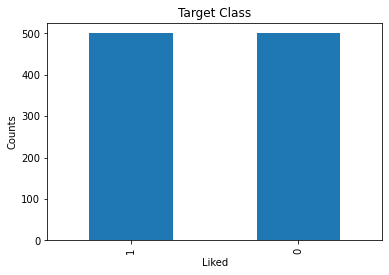

### Text Mining<a href="#Text-Mining" class="anchor-link">¶</a>

In \[122\]:

    # Changing text to tokens and convertion all of the words to lower case
    def tokens(words):
        words = re.sub("[^a-zA-Z]"," ", words)
        text = words.lower().split()                   
        return " ".join(text)

In \[123\]:

    df['Review_clear'] = df['Review'].apply(tokens) #apply allow the us to pass a function and apply it on every single value of the dataframe
    df['Review_clear'] = df['Review_clear'].astype(str)

In \[124\]:

    stop_words = nltk.corpus.stopwords.words("english") #extracting the stopwords from nltk library

    def stopwords(review): #function to remove stopwords
        text = [word.lower() for word in review.split() if word.lower() not in stop_words]
        return " ".join(text)

    df['Review_clear'] = df['Review'].apply(stopwords) # applyng function to dataframe using apply
    df.head()

Out\[124\]:

|     | Review                                            | Liked | Review_clear                                      |
|-----|---------------------------------------------------|-------|---------------------------------------------------|
| 0   | Wow... Loved this place.                          | 1     | wow... loved place.                               |
| 1   | Crust is not good.                                | 0     | crust good.                                       |
| 2   | Not tasty and the texture was just nasty.         | 0     | tasty texture nasty.                              |
| 3   | Stopped by during the late May bank holiday of... | 1     | stopped late may bank holiday rick steve recom... |
| 4   | The selection on the menu was great and so wer... | 1     | selection menu great prices.                      |

In \[125\]:

    # Removing all numbers
    def numbers(text):
        new_text = []
        for word in text.split():
            if not re.search('\d', word):
                new_text.append(word)
        return ' '.join(new_text)

### Normalization<a href="#Normalization" class="anchor-link">¶</a>

Normalization of words in the corpus by transform all of different forms
of the word into one.

In \[126\]:

    lem = WordNetLemmatizer()

    def lemma(text):
        lem_text = [lem.lemmatize(word) for word in text.split()]
        return " ".join(lem_text)

In \[127\]:

    df['Review_clear'] = df['Review_clear'].apply(lemma)
    df.head()

Out\[127\]:

|     | Review                                            | Liked | Review_clear                                      |
|-----|---------------------------------------------------|-------|---------------------------------------------------|
| 0   | Wow... Loved this place.                          | 1     | wow... loved place.                               |
| 1   | Crust is not good.                                | 0     | crust good.                                       |
| 2   | Not tasty and the texture was just nasty.         | 0     | tasty texture nasty.                              |
| 3   | Stopped by during the late May bank holiday of... | 1     | stopped late may bank holiday rick steve recom... |
| 4   | The selection on the menu was great and so wer... | 1     | selection menu great prices.                      |

### WordCloud - Repetition of words<a href="#WordCloud---Repetition-of-words" class="anchor-link">¶</a>

Word Clouds for reviews, representing most common words in each target
class.

In \[128\]:

    positive = df[df.Liked== 1]
    negative = df[df.Liked== 0]
    positive.head()

Out\[128\]:

|     | Review                                            | Liked | Review_clear                                      |
|-----|---------------------------------------------------|-------|---------------------------------------------------|
| 0   | Wow... Loved this place.                          | 1     | wow... loved place.                               |
| 3   | Stopped by during the late May bank holiday of... | 1     | stopped late may bank holiday rick steve recom... |
| 4   | The selection on the menu was great and so wer... | 1     | selection menu great prices.                      |
| 8   | The fries were great too.                         | 1     | fry great too.                                    |
| 9   | A great touch.                                    | 1     | great touch.                                      |

In \[129\]:

    negative.head()

Out\[129\]:

|     | Review                                            | Liked | Review_clear                                      |
|-----|---------------------------------------------------|-------|---------------------------------------------------|
| 1   | Crust is not good.                                | 0     | crust good.                                       |
| 2   | Not tasty and the texture was just nasty.         | 0     | tasty texture nasty.                              |
| 5   | Now I am getting angry and I want my damn pho.    | 0     | getting angry want damn pho.                      |
| 6   | Honeslty it didn't taste THAT fresh.)             | 0     | honeslty taste fresh.)                            |
| 7   | The potatoes were like rubber and you could te... | 0     | potato like rubber could tell made ahead time ... |

In \[130\]:

    positive_words =[]

    for review in positive.Review_clear:
        positive_words.append(review) 
    positive_words = ' '.join(positive_words)
    positive_words[:100]

Out\[130\]:

    'wow... loved place. stopped late may bank holiday rick steve recommendation loved it. selection menu'

In \[131\]:

    negative_words = []

    for review in negative.Review_clear:
        negative_words.append(review)
    negative_words = ' '.join(negative_words)
    negative_words[:100]

Out\[131\]:

    'crust good. tasty texture nasty. getting angry want damn pho. honeslty taste fresh.) potato like rub'

### Most Common words in Positive Review<a href="#Most-Common-words-in-Positive-Review" class="anchor-link">¶</a>

In \[132\]:

    wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

    wordcloud.generate(positive_words)

    plt.figure(figsize=(13,13))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

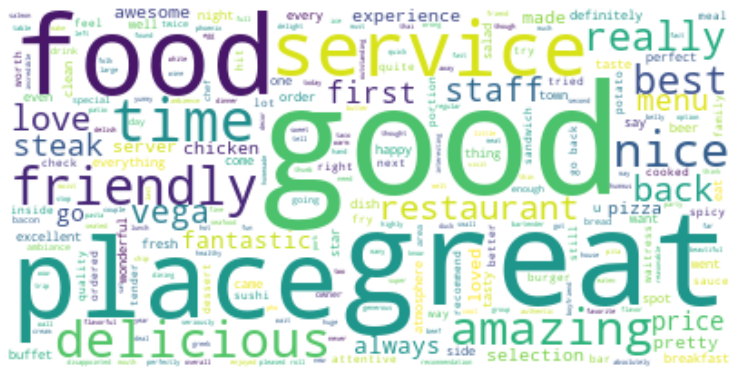

### Most Common words in Negative Review<a href="#Most-Common-words-in-Negative-Review" class="anchor-link">¶</a>

In \[133\]:

    wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

    wordcloud.generate(negative_words)

    plt.figure(figsize=(13,13))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

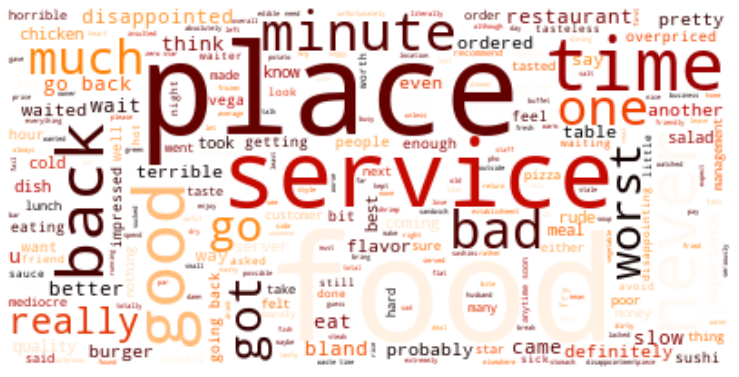

In \[134\]:

    # Calculating Sentiment 
    sia = SentimentIntensityAnalyzer()
    sentiment = [None]*df.shape[0]
    for index, data in df.iterrows():
        sentiment[index] = sia.polarity_scores(data['Review_clear'])['compound']
    df.insert(df.shape[1],'sentiment',sentiment)

In \[144\]:

    # Reviws with sentiment
    df[["Review" ,"sentiment"]].sort_values(by="sentiment", ascending=False)

Out\[144\]:

|     | Review                                            | sentiment |
|-----|---------------------------------------------------|-----------|
| 537 | Great steak, great sides, great wine, amazing ... | 0.9524    |
| 585 | Great food and great service in a clean and fr... | 0.9337    |
| 603 | Good value, great food, great service.            | 0.9260    |
| 629 | The staff is always super friendly and helpful... | 0.9150    |
| 55  | Loved it...friendly servers, great food, wonde... | 0.9136    |
| ... | ...                                               | ...       |
| 495 | And then tragedy struck.                          | -0.7506   |
| 336 | First - the bathrooms at this location were di... | -0.7633   |
| 44  | Frozen pucks of disgust, with some of the wors... | -0.8402   |
| 492 | Worse of all, he humiliated his worker right i... | -0.8402   |
| 289 | I hate to disagree with my fellow Yelpers, but... | -0.8555   |

1000 rows × 2 columns

### Models<a href="#Models" class="anchor-link">¶</a>

We use the following classification models:

Logistic Regression, Naive Bayes, Random Forest, Ada Boosting.

To run machine learning algorithms we need to convert text files into
numerical feature vectors. We will use bag of words model for our
analysis.

In \[146\]:

    # spliting the data into train and test sets
    X = df['Review_clear']
    y = df['Liked']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In \[147\]:

    # creating a numerical feature vector for each document
    vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

    X_train_vectorized = vect.transform(X_train)

    len(vect.get_feature_names())

Out\[147\]:

    208

In \[148\]:

    #Logistic Regression
    model = LogisticRegression()
    model.fit(X_train_vectorized, y_train)

    ytest = np.array(y_test)
    predictions = model.predict(vect.transform(X_test))

    print('accuracy %s' % accuracy_score(predictions, y_test))
    print(classification_report(ytest, predictions))

    accuracy 0.665
                  precision    recall  f1-score   support

               0       0.62      0.77      0.69        97
               1       0.72      0.56      0.63       103

        accuracy                           0.67       200
       macro avg       0.68      0.67      0.66       200
    weighted avg       0.68      0.67      0.66       200

In \[149\]:

    #Naive Bayes
    model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                       ('tfidf', TfidfTransformer()),
                       ('clf',MultinomialNB()),
                       ])

    model_nb.fit(X_train, y_train)

    ytest = np.array(y_test)
    pred_y = model_nb.predict(X_test)

    print('accuracy %s' % accuracy_score(pred_y, y_test))
    print(classification_report(ytest, pred_y))

    accuracy 0.685
                  precision    recall  f1-score   support

               0       0.66      0.71      0.69        97
               1       0.71      0.66      0.68       103

        accuracy                           0.69       200
       macro avg       0.69      0.69      0.68       200
    weighted avg       0.69      0.69      0.68       200

In \[140\]:

    #Random Forest
    model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                        ('tfidf', TfidfTransformer()),
                        ('clf-rf', RandomForestClassifier(n_estimators=50)),
                        ])

    model_rf.fit(X_train, y_train)

    ytest = np.array(y_test)
    pred = model_rf.predict(X_test)

    print('accuracy %s' % accuracy_score(pred, y_test))
    print(classification_report(ytest, pred))

    accuracy 0.685
                  precision    recall  f1-score   support

               0       0.64      0.80      0.71        97
               1       0.76      0.57      0.65       103

        accuracy                           0.69       200
       macro avg       0.70      0.69      0.68       200
    weighted avg       0.70      0.69      0.68       200

In \[141\]:

    #Ada Boosting
    ada = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-ada', AdaBoostClassifier()),
                    ])

    ada.fit(X_train, y_train)
    ytest = np.array(y_test)
    ada_pred = ada.predict(X_test)

    print('accuracy %s' % accuracy_score(ada_pred, y_test))
    print(classification_report(ytest, ada_pred))

    accuracy 0.68
                  precision    recall  f1-score   support

               0       0.63      0.80      0.71        97
               1       0.75      0.56      0.64       103

        accuracy                           0.68       200
       macro avg       0.69      0.68      0.68       200
    weighted avg       0.70      0.68      0.68       200

### Which one is the best model?<a href="#Which-one-is-the-best-model?" class="anchor-link">¶</a>

In \[142\]:

    log_acc = accuracy_score(predictions, y_test)
    nb_acc = accuracy_score(pred_y, y_test)
    rf_acc = accuracy_score(pred, y_test)
    ada_acc = accuracy_score(ada_pred, y_test)

In \[143\]:

    models = pd.DataFrame({
                          'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'AdaBoosting'],
                          'Score': [log_acc, nb_acc, rf_acc, ada_acc]})
    models.sort_values(by='Score', ascending=False)

Out\[143\]:

|     | Model               | Score |
|-----|---------------------|-------|
| 1   | Naive Bayes         | 0.685 |
| 2   | Random Forest       | 0.685 |
| 3   | AdaBoosting         | 0.680 |
| 0   | Logistic Regression | 0.665 |

### Conclusion<a href="#Conclusion" class="anchor-link">¶</a>

This project was aimed to used sentiment analysis to determine the reviews of the restaurant
. We started with the data wrangling and text mining, which cover change
text into tokens, remove punctuation, numbers, stop words and
normalization them by using lemmatization. Following we used bag of
words model to convert the text into numerical feature vectors. Finally
we started training different Classification models and we got the best
accuracy of 0.685 for Logistic Regression & Random Forest methods.

In \[ \]: